# Neural network implementation with Numpy

* Building an artificial neural network from scratch to categorize handwritten digits

## Preparing the data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data = np.array(data)
m,n = data.shape

In [4]:
data.shape

(42000, 785)

In [5]:
train_data = data[0:-1000].T
train_data.shape

(785, 41000)

In [6]:
X_train = train_data[1:]
y_train = train_data[0]

In [7]:
X_train.shape

(784, 41000)

In [8]:
y_train.shape

(41000,)

In [9]:
test_data = data[-1000:].T

In [10]:
X_test = test_data[1:]
y_test = test_data[0]

In [11]:
X_test.shape

(784, 1000)

In [12]:
y_test.shape

(1000,)

In [13]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
X_train = X_train / 255
X_test = X_test / 255

Label: 7


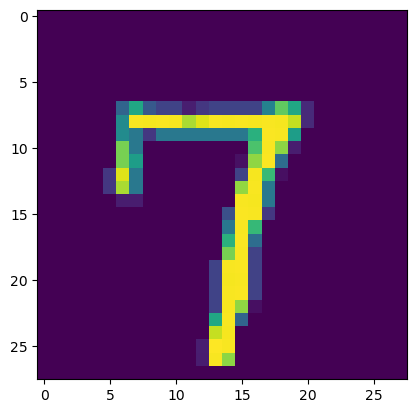

In [15]:
index = 6

print("Label:", y_train[index])

image = (X_train[:, index]).reshape(28,28)

plt.imshow(image);

## Building the neural network

In [16]:
class NN():
    def __init__(self, X_train, y_train, iterations, alpha):
        
        self.X_train = X_train
        self.y_train = y_train
        
        self.W1 = np.random.rand(10, 784) - 0.5
        self.b1 = np.random.rand(10, 1) - 0.5
        self.W2 = np.random.rand(10, 10) - 0.5
        self.b2 = np.random.rand(10, 1) - 0.5
        
        self.iterations = iterations
        self.alpha = alpha
        
    def ReLU(self, Z):
        activated = np.maximum(Z, 0)
        
        return activated
    
    def softmax(self, Z):
        activated = np.exp(Z) / sum(np.exp(Z))
        
        return activated
    
    def forward_propagation(self):
        
        Z1 = self.W1.dot(self.X_train) + self.b1
        y1 = self.ReLU(Z1)
        Z2 = self.W2.dot(y1) + self.b2
        y2 = self.softmax(Z2)
        
        return Z1, y1, Z2, y2
        
    def one_hot(self, array):
        
        one_hot_Y = np.zeros((array.size, array.max() + 1)) # Creates a Y.size x [ Y.max()+1 ]=10, matrix of zeros
        one_hot_Y[np.arange(array.size), array] = 1
        one_hot_Y = one_hot_Y.T
        
        return one_hot_Y
    
    def dReLu(self, Z):
        return Z>0
        
    def backward_propagation(self, Z1, y1, Z2, y2):
        
        m = self.y_train.size
        one_hot_Y = self.one_hot(self.y_train)
        
        dz2 = y2 - one_hot_Y
        dw2 = 1/m * dz2.dot(y1.T)
        db2 = 1/m * np.sum(dz2)
        
        dz1 = self.W2.T.dot(dz2) * self.dReLu(Z1)
        dw1 = 1/m * dz1.dot(self.X_train.T)
        db1 = 1/m * np.sum(dz1)
        
        return dw1, db1, dw2, db2
    
    def update_parameters(self, dw1, db1, dw2, db2):

        self.W1 = self.W1 - self.alpha * dw1
        self.b1 = self.b1 - self.alpha * db1
        
        self.W2 = self.W2 - self.alpha * dw2
        self.b2 = self.b2 - self.alpha * db2
        
    def get_predictions(self, y2):
        
        return np.argmax(y2, 0)

    def get_accuracy(self, predictions, labels):
        
        return round(np.sum(predictions == labels) / labels.size,3)
        
    def train(self):
        
        for i in range(self.iterations + 1):
            
            Z1, y1, Z2, y2 = self.forward_propagation()
            dw1, db1, dw2, db2 = self.backward_propagation(Z1, y1, Z2, y2)
            self.update_parameters(dw1, db1, dw2, db2)
            
            if (i % 10 == 0):
                #print(self.alpha)
                print("Iteration:", i)
                print("Accuracy:", str(self.get_accuracy(self.get_predictions(y2), self.y_train)) + "\n")
                
    def predict(self, image):
        
        Z1 = self.W1.dot(image) + self.b1
        y1 = self.ReLU(Z1)
        Z2 = self.W2.dot(y1) + self.b2
        y2 = self.softmax(Z2)
        prediction = self.get_predictions(y2)
        
        return prediction

In [17]:
model = NN(X_train, y_train, 350, 0.15)

model.train()

Iteration: 0
Accuracy: 0.142

Iteration: 10
Accuracy: 0.258

Iteration: 20
Accuracy: 0.378

Iteration: 30
Accuracy: 0.458

Iteration: 40
Accuracy: 0.529

Iteration: 50
Accuracy: 0.583

Iteration: 60
Accuracy: 0.627

Iteration: 70
Accuracy: 0.661

Iteration: 80
Accuracy: 0.69

Iteration: 90
Accuracy: 0.711

Iteration: 100
Accuracy: 0.729

Iteration: 110
Accuracy: 0.744

Iteration: 120
Accuracy: 0.757

Iteration: 130
Accuracy: 0.769

Iteration: 140
Accuracy: 0.779

Iteration: 150
Accuracy: 0.787

Iteration: 160
Accuracy: 0.795

Iteration: 170
Accuracy: 0.801

Iteration: 180
Accuracy: 0.808

Iteration: 190
Accuracy: 0.813

Iteration: 200
Accuracy: 0.818

Iteration: 210
Accuracy: 0.822

Iteration: 220
Accuracy: 0.826

Iteration: 230
Accuracy: 0.83

Iteration: 240
Accuracy: 0.832

Iteration: 250
Accuracy: 0.835

Iteration: 260
Accuracy: 0.837

Iteration: 270
Accuracy: 0.841

Iteration: 280
Accuracy: 0.843

Iteration: 290
Accuracy: 0.845

Iteration: 300
Accuracy: 0.847

Iteration: 310
Accura

# Test the model

Label: 5


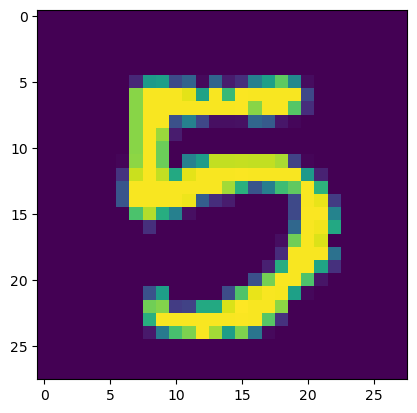

In [18]:
index = 21

print("Label:", y_test[index])

image = (X_test[:, index]).reshape(28,28)
plt.imshow(image);

In [19]:
prediction = model.predict(X_test[:, index, None])[0]
label = y_test[index]

print("Predicted label:", prediction)
print("Correct label:", label)

Predicted label: 5
Correct label: 5


In [20]:
all_predictions = model.predict(X_test)

all_predictions

print("Test set accuracy:", model.get_accuracy(all_predictions, y_test))

Test set accuracy: 0.852
